In [1]:
# Importing necessary modeules
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

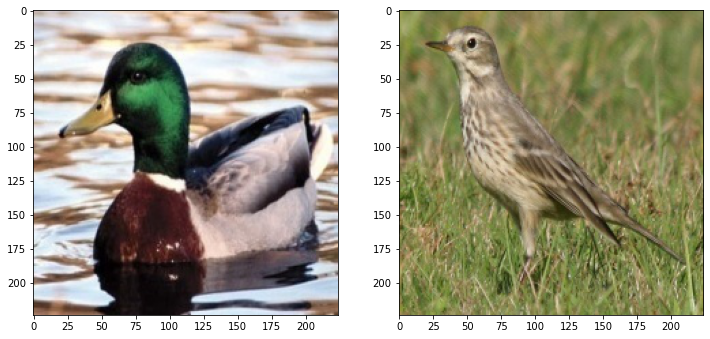

In [2]:
# Checking images
im = image.load_img("../train/duck/001.jpg")
im1 = image.load_img("../train/bird/001.jpg")
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(im)
ax[1].imshow(im1)
plt.show()

In [3]:
# Checking image shape
# cv2.imread("../train/duck/001.jpg")

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [5]:
# Labeling Training datset
train_dataset = train.flow_from_directory("../train/", target_size=(200,200), batch_size=4, class_mode='binary')

Found 228 images belonging to 2 classes.


In [6]:
# Labeling Validation datset
validation_dataset = validation.flow_from_directory("../validation/", target_size=(200,200), batch_size=4, class_mode='binary')

Found 26 images belonging to 2 classes.


In [7]:
# test_dataset = test.flow_from_directory("../test/", target_size=(200,200), batch_size=4, class_mode='binary')

In [8]:
# Checking labels
train_dataset.class_indices

{'bird': 0, 'duck': 1}

In [9]:
# Checking labels
validation_dataset.class_indices 

{'bird': 0, 'duck': 1}

In [10]:
# Checking classes
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Creating CNN model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# Compiling Model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
# Fitting Model
model.fit(train_dataset, steps_per_epoch=3, epochs=50, validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 323ms/step - loss: 0.1250 - accuracy: 1.0000 - val_loss: 2.4778 - val_accuracy: 0.5385
Epoch 2/50
3/3 [==============================] - 1s 270ms/step - loss: 0.2744 - accuracy: 0.9167 - val_loss: 1.4642 - val_accuracy: 0.6154
Epoch 3/50
3/3 [==============================] - 1s 273ms/step - loss: 0.2587 - accuracy: 0.8333 - val_loss: 1.2015 - val_accuracy: 0.5769
Epoch 4/50
3/3 [==============================] - 1s 269ms/step - loss: 0.4108 - accuracy: 0.7500 - val_loss: 1.1366 - val_accuracy: 0.5769
Epoch 5/50
3/3 [==============================] - 1s 271ms/step - loss: 0.4576 - accuracy: 0.6667 - val_loss: 0.9865 - val_accuracy: 0.5385
Epoch 6/50
3/3 [==============================] - 1s 267ms/step - loss: 0.1417 - accuracy: 0.9167 - val_loss: 1.1321 - val_accuracy: 0.5769
Epoch 7/50
3/3 [==============================] - 1s 269ms/step - loss: 0.2023 - accuracy: 1.0000 - val_loss: 1.1562 - val_accuracy: 0.5000
Epoch 8/50
3/3 [====

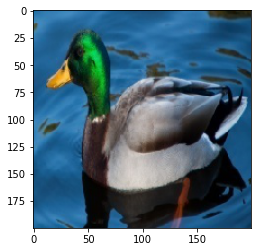

Duck


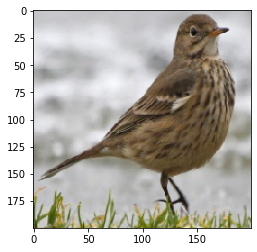

Bird


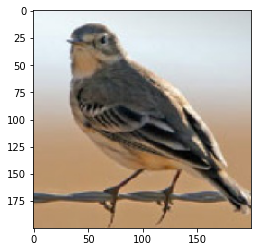

Duck


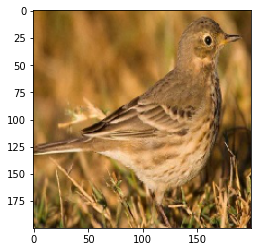

Bird


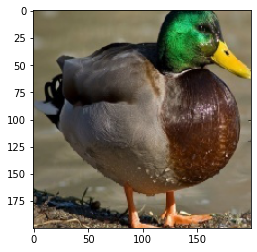

Duck


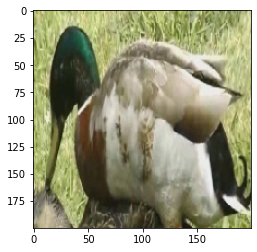

Duck


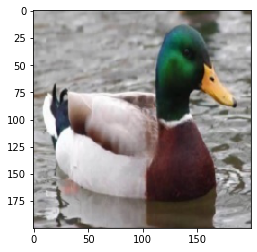

Duck


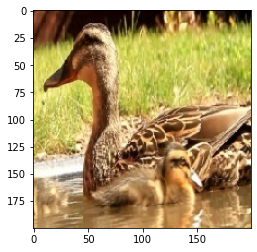

Bird


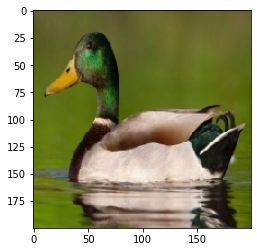

Duck


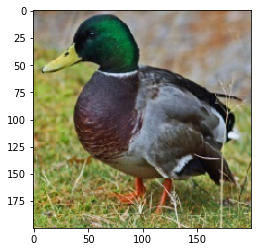

Duck


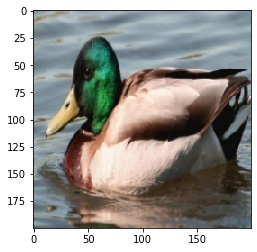

Duck


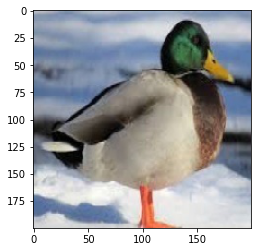

Duck


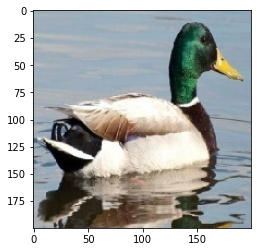

Duck


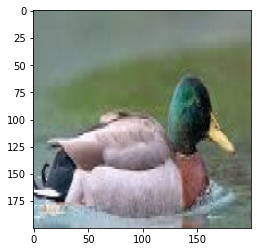

Duck


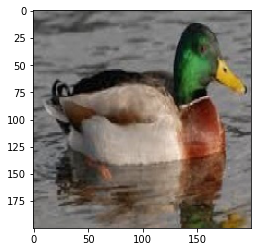

Duck


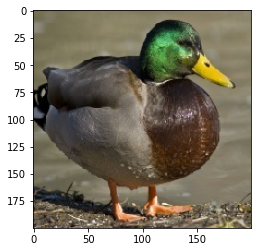

Duck


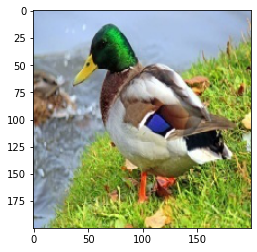

Duck


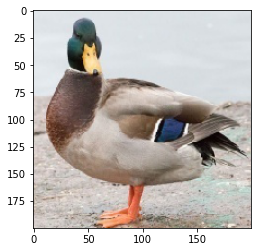

Duck


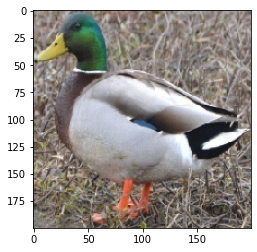

Duck


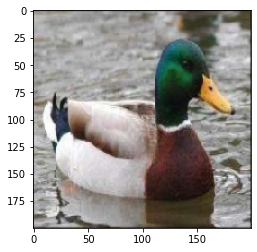

Duck


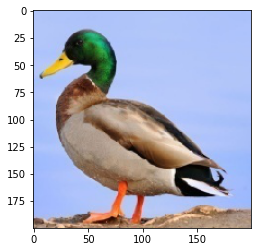

Bird


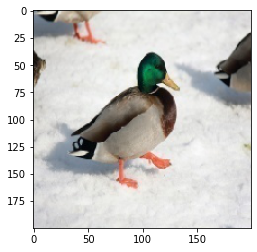

Duck


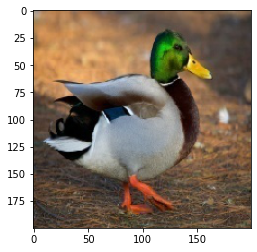

Duck


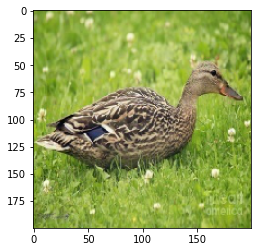

Duck


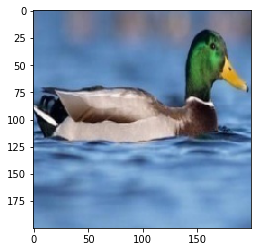

Duck


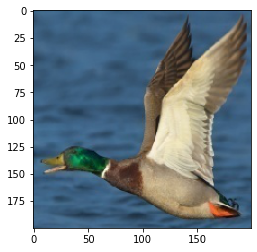

Duck


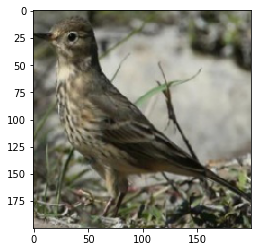

Bird


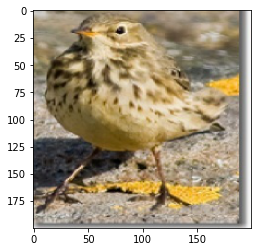

Bird


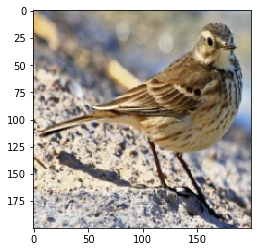

Bird


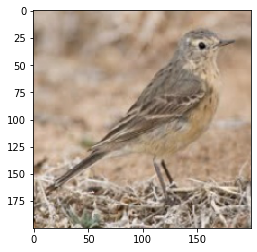

Bird


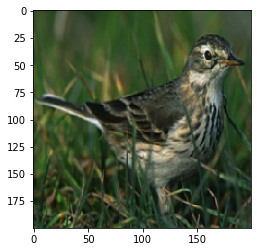

Duck


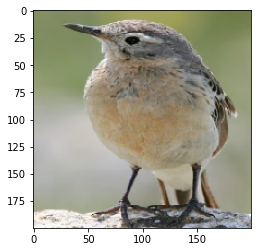

Bird


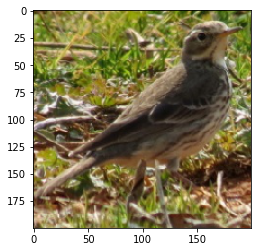

Duck


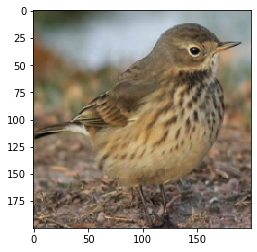

Duck


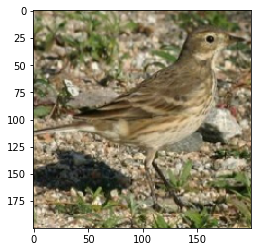

Duck


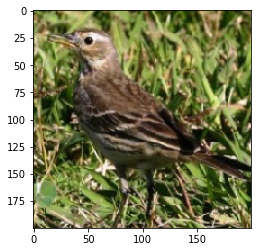

Bird


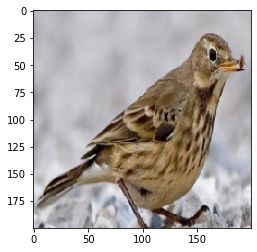

Bird


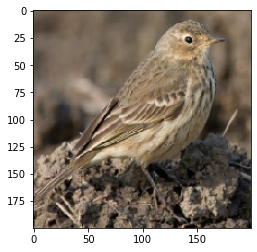

Duck


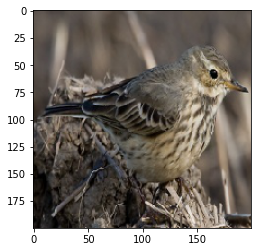

Bird


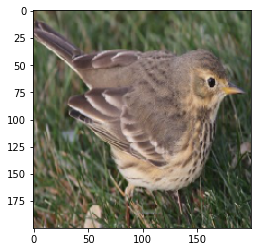

Duck


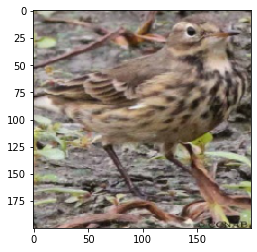

Bird


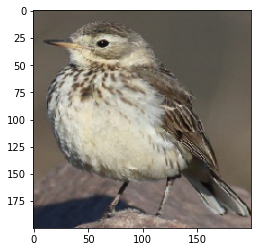

Duck


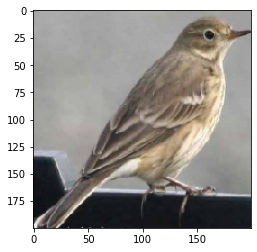

Duck


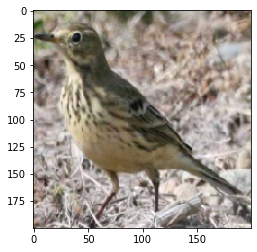

Bird


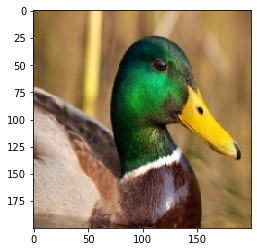

Duck


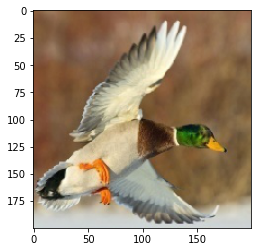

Duck


In [14]:
# Manually Predicting 
test_path = '../test'
for i in os.listdir(test_path):
    img = image.load_img(test_path + "//" +i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print('Bird')
    else:
        print('Duck')